# The Spark Foundation - GRIP (Data Science and Business Analytics - JUN'22)

# Author - AMAN KUMAR SINGH

Task #2 From the given 'Iris' dataset, predict the optimum number of clusters and represent it virtually

 Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white',color_codes=True)

%matplotlib inline
print("Imported sucessfully")

Imported sucessfully


Importing the dataset

In [2]:
df = sns.load_dataset('iris')
print("Iris data loaded Successfully")

Iris data loaded Successfully


Data Exploration and Analysis

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


how much data points do each species have

In [4]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

checking for any null values

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

checking the min,max,mean,percentile for each of the numerical features

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Preparing the data

In [7]:
X = df.iloc[:,:4].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
X.shape

(150, 4)

In [9]:
Y = df.iloc[:,-1:]
Y.shape

(150, 1)

Finding the optimum no of Clusters

finding optimum no of clusters for k means classification
using elbow method

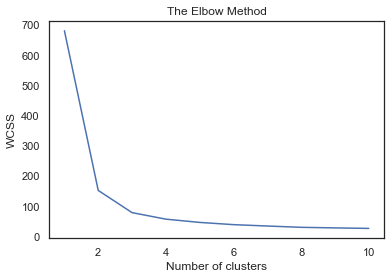

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Applying k-means to the dataset

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

 Data Visualization

visualizing the clusters - on the first 2 columns(sepal_length and sepal_width)

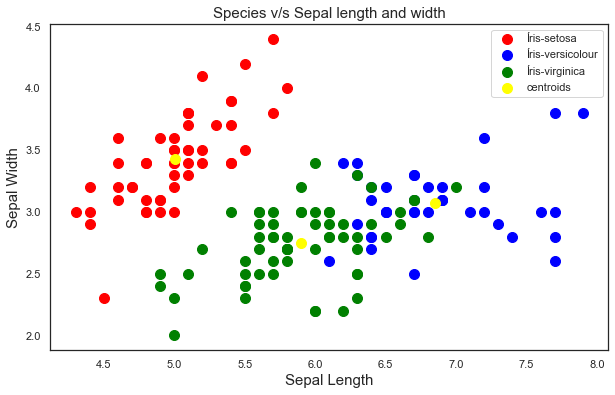

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 1, 0],X[y_kmeans == 1,1], s= 100, c= 'red', label ='Íris-setosa')
plt.scatter(X[y_kmeans == 2, 0],X[y_kmeans == 2,1], s= 100, c= 'blue', label = 'Íris-versicolour')
plt.scatter(X[y_kmeans == 0, 0],X[y_kmeans == 0,1], s= 100, c= 'green', label = 'Íris-virginica')

#plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'yellow' ,label='centroids')
plt.title('Species v/s Sepal length and width', size = 15)
plt.xlabel('Sepal Length', size = 15)
plt.ylabel('Sepal Width', size=15)
plt.legend()
plt.show()



visualization each species with line plot

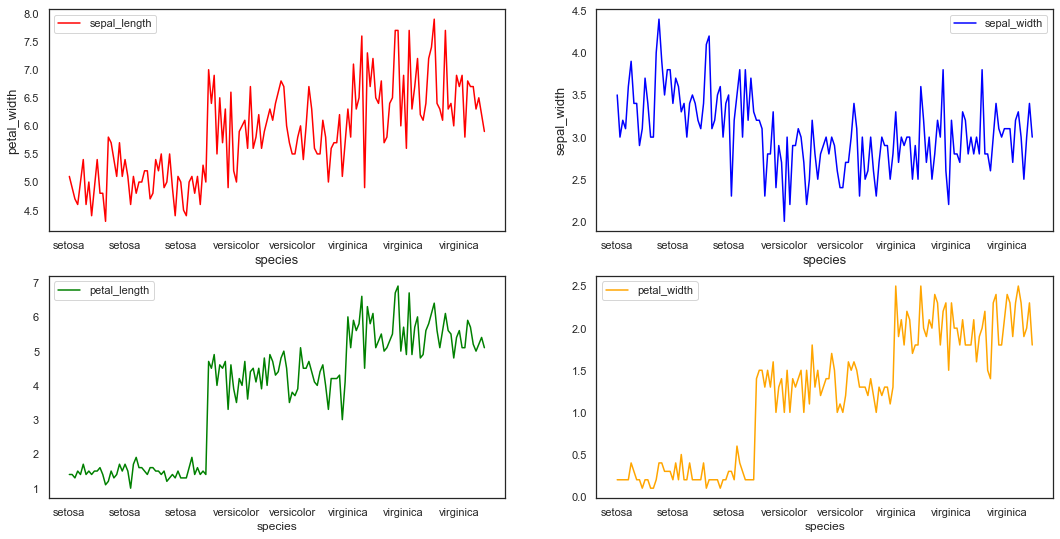

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

#SubPlot 1:
df.plot(kind='line', color='red',x='species',y='sepal_length',figsize=(18,9),ax=ax1) #added to subplot1
ax1.set_xlabel('species', size=13)
ax1.set_ylabel('sepal_length', size=13)

#SubPlot 2:
df.plot(kind='line', color='blue',x='species',y='sepal_width',figsize=(18,9),ax=ax2) #added to subplot2
ax2.set_xlabel('species', size=13)
ax2.set_ylabel('sepal_width', size=13)

#SubPlot 3:
df.plot(kind='line', color='green',x='species',y='petal_length',figsize=(18,9),ax=ax3) #added to subplot3
ax1.set_xlabel('species', size=13)
ax1.set_ylabel('petal_length', size=13)

#SubPlot 4:
df.plot(kind='line', color='orange',x='species',y='petal_width',figsize=(18,9),ax=ax4) #added to subplot4
ax1.set_xlabel('species', size=13)
ax1.set_ylabel('petal_width', size=13)

plt.show()

visualizing with violin plot

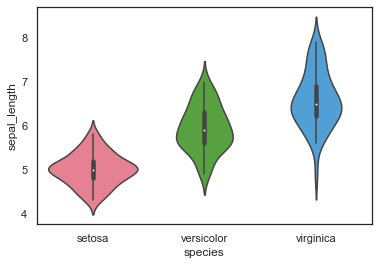

In [14]:
sns.violinplot(x="species", y="sepal_length",palette="husl", data=df)
plt.show()

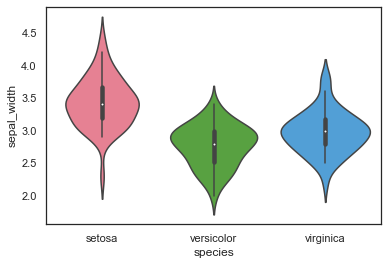

In [15]:
sns.violinplot(x="species", y="sepal_width",palette="husl", data=df)
plt.show()

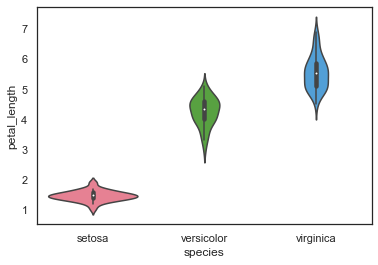

In [16]:
sns.violinplot(x="species", y="petal_length",palette="husl", data=df)
plt.show()

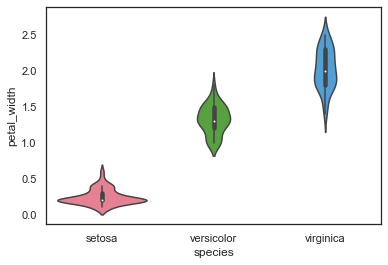

In [17]:
sns.violinplot(x="species", y="petal_width",palette="husl", data=df)
plt.show()

vsiualization with boxplot

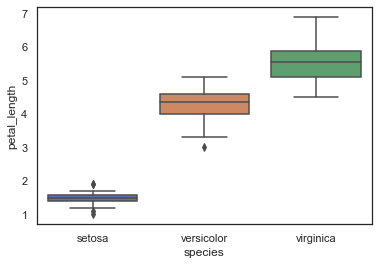

In [18]:
sns.boxplot(x='species', y='petal_length', data=df)
plt.show()

pairplot is very useful in visualizing the data quickly with all features together,
we can also change the diagonal plot to any other plot

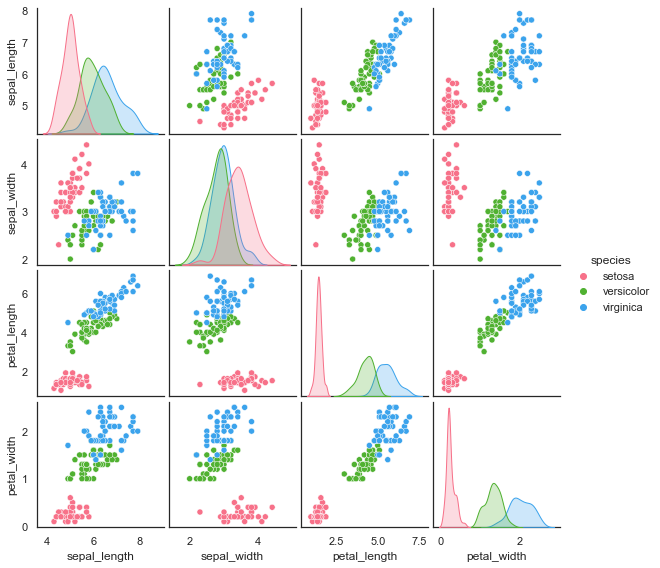

In [19]:
sns.pairplot(data=df,hue="species", palette = "husl", height=2, diag_kind = 'kde')
plt.show()

Ater visualizing the iris dataset we come to know that setosa specie is very different from virginica and versicolor, setosa has small sepal length,pedal width but  has large value for sepal width , and virginica and versicolor is quite similar to each other but not exactly.Virginica has large value for petal length, petal width, sepal length and Versicolor has quite lower value than virginica